# Pro Analysis Tips & Tricks

In [8]:
import dabl
import numpy as np
import pandas as pd
import pandas_datareader as pdr

import warnings
warnings.filterwarnings('ignore')

/Users/harshit/dswh/test_env/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


Target looks like classification
Linear Discriminant Analysis training set score: 0.504


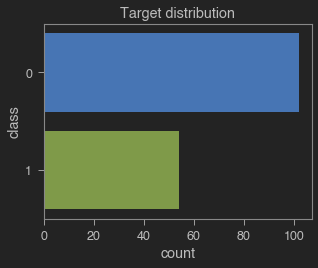

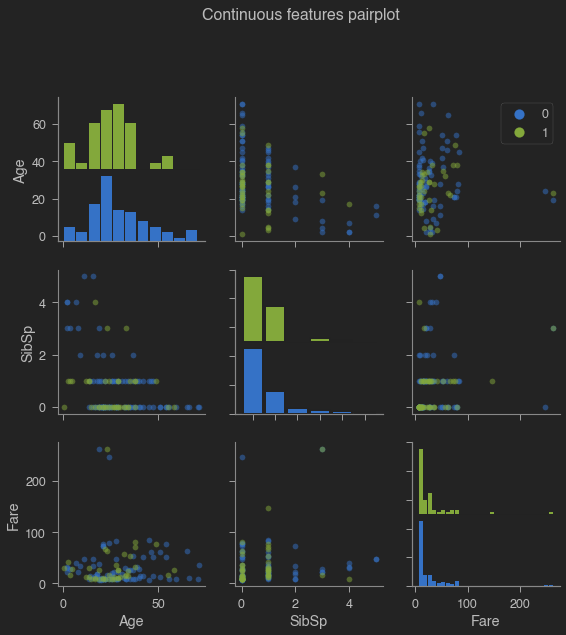

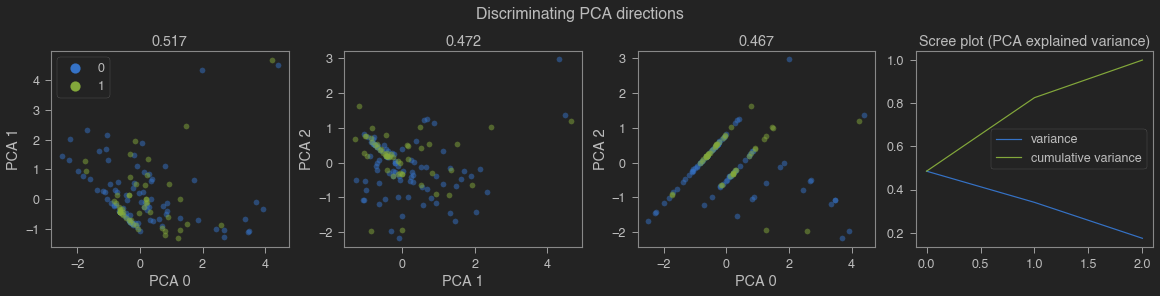

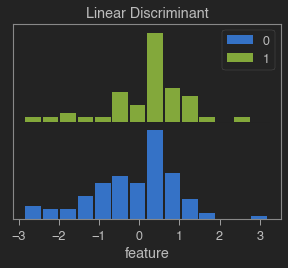

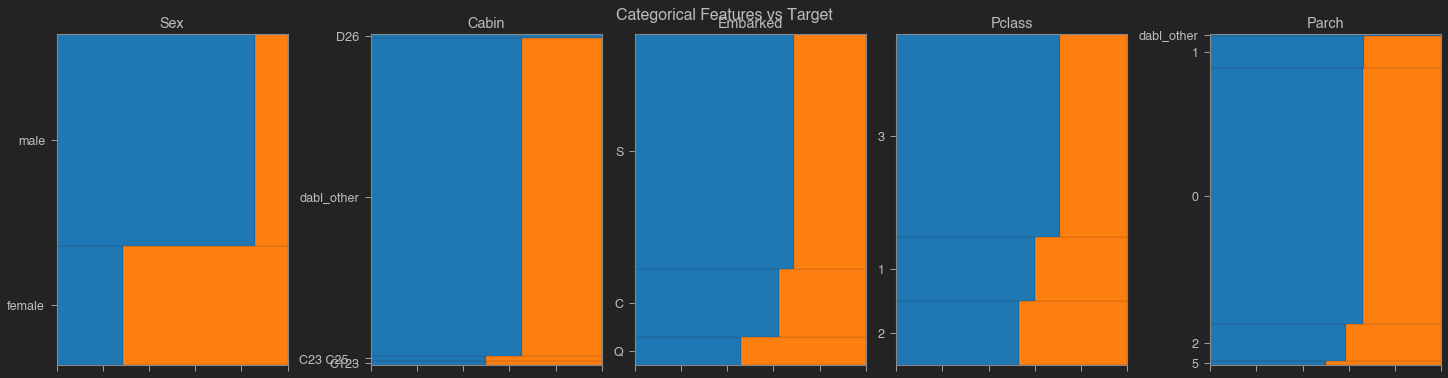

In [15]:
dabl.plot(df_clean, target_col="Survived")

In [2]:
df = pdr.get_data_fred('GS10')
df.head()

,GS10
DATE,
2015-07-01,2.32
2015-08-01,2.17
2015-09-01,2.17
2015-10-01,2.07
2015-11-01,2.26


In [3]:
%time
alist = []
for i in range(100):
    alist.append(i)
print(alist)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


In [4]:
%%latex
This is a differential equation: $\frac{du}{dt}  and  \frac{d^2 u}{dx^2}$


<IPython.core.display.Latex object>

In [5]:
a = []
a_len = len(a)
b = 95
result = b / a_len


ZeroDivisionError: division by zero

In [6]:
%debug

> <ipython-input-5-c511af7d5ec5>(4)<module>()
      1 a = []
      2 a_len = len(a)
      3 b = 95
----> 4 result = b / a_len

ipdb> a_len
0
ipdb> b
ipdb> result
*** NameError: name 'result' is not defined
ipdb> q


In [7]:
print(result)

NameError: name 'result' is not defined

In [14]:
from jupyterthemes import jtplot

jtplot.style('monokai')
jtplot.style(context='talk', fscale=1.4, spines=False, gridlines='--')
jtplot.style(ticks=True, grid=False, figsize=(6, 4.5))

In [10]:
import dabl
df = pd.read_csv('https://gist.githubusercontent.com/michhar/2dfd2de0d4f8727f873422c5d959fff5/raw/23da2b7680e0c9e1fd831f05f53de3958f0d75fe/titanic.csv')
df_clean = dabl.clean(df, verbose=1)

Detected feature types:
2 float, 5 int, 5 object, 0 date, 0 other
Interpreted as:
continuous      2
dirty_float     0
low_card_int    1
categorical     6
date            0
free_string     2
useless         1
dtype: int64


In [11]:
types = dabl.detect_types(df_clean)
print(types)

          continuous  dirty_float  low_card_int  categorical   date  \
Survived       False        False         False         True  False   
Pclass         False        False         False         True  False   
Name           False        False         False        False  False   
Sex            False        False         False         True  False   
Age             True        False         False        False  False   
SibSp          False        False          True        False  False   
Parch          False        False         False         True  False   
Ticket         False        False         False        False  False   
Fare            True        False         False        False  False   
Cabin          False        False         False         True  False   
Embarked       False        False         False         True  False   

          free_string  useless  
Survived        False    False  
Pclass          False    False  
Name             True    False  
Sex            

Target looks like classification
Linear Discriminant Analysis training set score: 0.504


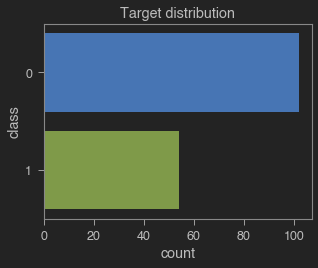

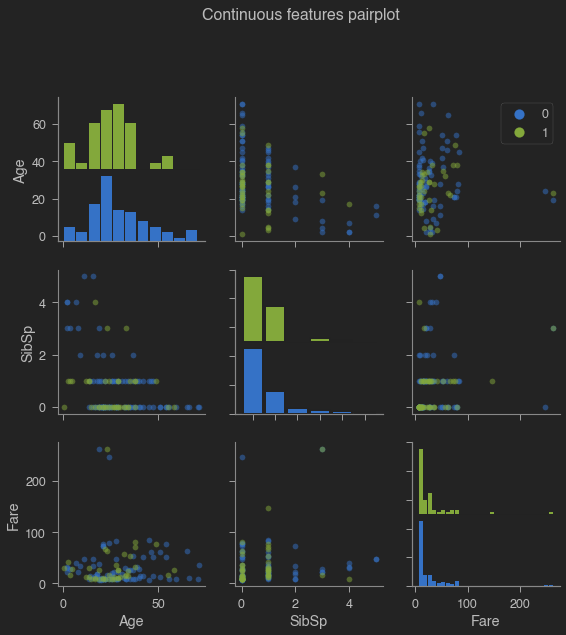

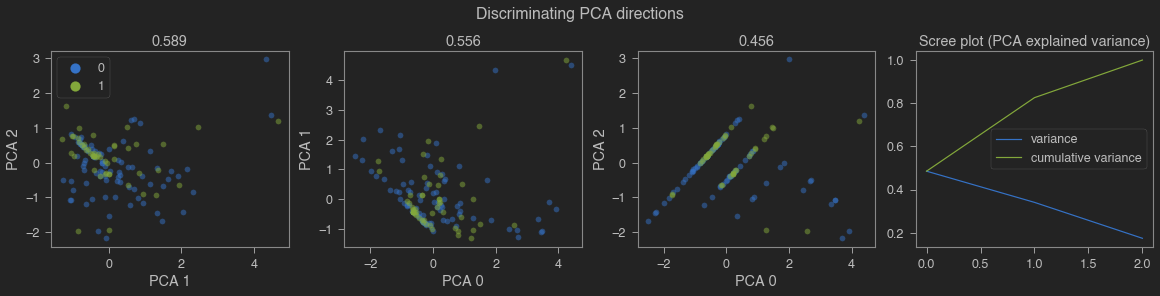

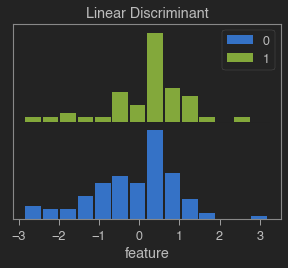

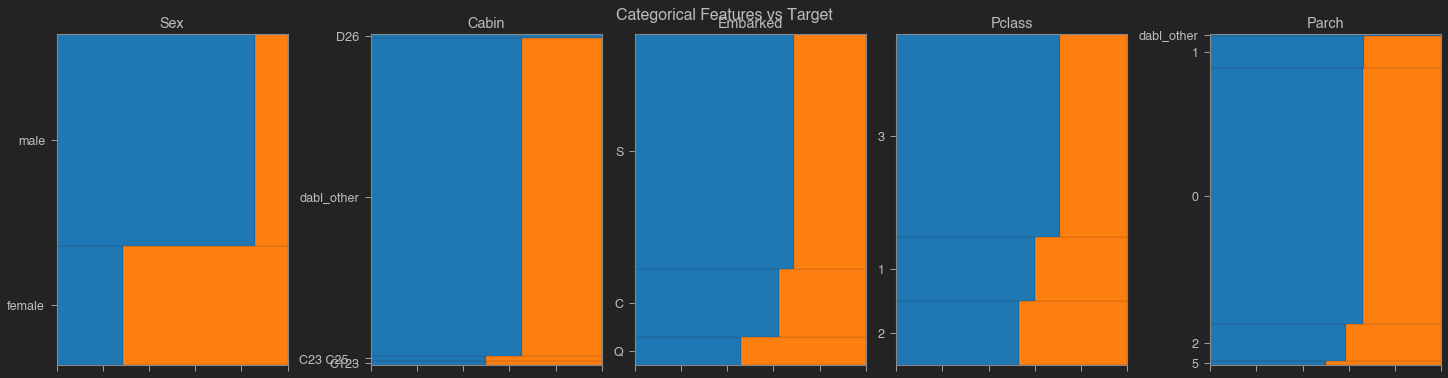

In [14]:
dabl.plot(df_clean, target_col="Survived")

In [16]:
survivor_classifier = dabl.SimpleClassifier(random_state=0).fit(df_clean, target_col="Survived") 


Running DummyClassifier(strategy='prior')
accuracy: 0.654 average_precision: 0.346 roc_auc: 0.500 recall_macro: 0.500 f1_macro: 0.395
=== new best DummyClassifier(strategy='prior') (using recall_macro):
accuracy: 0.654 average_precision: 0.346 roc_auc: 0.500 recall_macro: 0.500 f1_macro: 0.395

Running GaussianNB()
accuracy: 0.590 average_precision: 0.606 roc_auc: 0.700 recall_macro: 0.487 f1_macro: 0.390
Running MultinomialNB()
accuracy: 0.763 average_precision: 0.756 roc_auc: 0.804 recall_macro: 0.713 f1_macro: 0.720
=== new best MultinomialNB() (using recall_macro):
accuracy: 0.763 average_precision: 0.756 roc_auc: 0.804 recall_macro: 0.713 f1_macro: 0.720

Running DecisionTreeClassifier(class_weight='balanced', max_depth=1)
accuracy: 0.807 average_precision: 0.619 roc_auc: 0.790 recall_macro: 0.790 f1_macro: 0.788
=== new best DecisionTreeClassifier(class_weight='balanced', max_depth=1) (using recall_macro):
accuracy: 0.807 average_precision: 0.619 roc_auc: 0.790 recall_macro: 0.79

In [22]:
! pip install emot
import emot

You should consider upgrading via the 'pip install --upgrade pip' command.


In [20]:
sentence = "it's a sunny day ☀️, let's go fishing! 🐟"
emot.emoji(sentence)

{'value': ['☀', '🐟'],
 'mean': [':sun:', ':fish:'],
 'location': [[17, 17], [39, 39]],
 'flag': True}

In [24]:
! pip install missingno
import missingno as mi

You should consider upgrading via the 'pip install --upgrade pip' command.


In [25]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             30
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          125
Embarked         1
dtype: int64

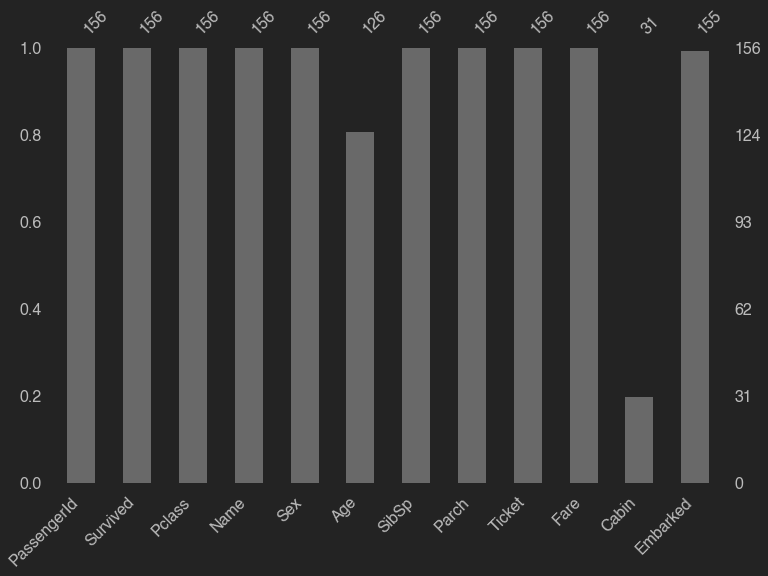

In [27]:
mi.bar(df, figsize=(12,8))

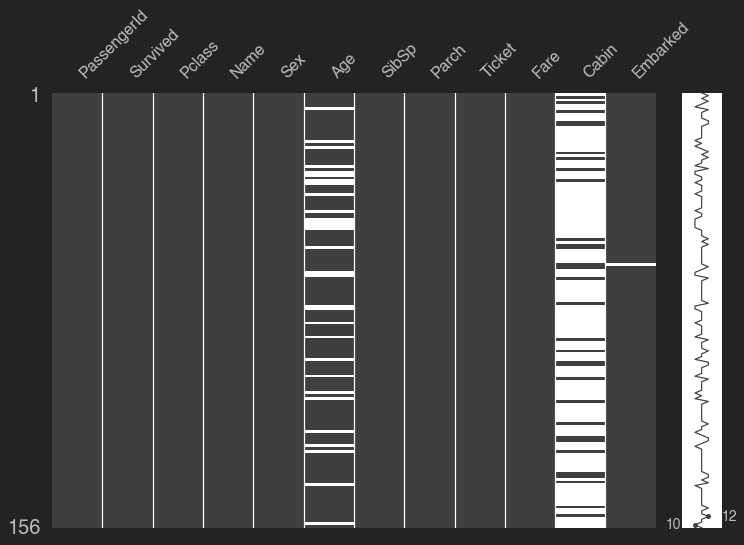

In [28]:
mi.matrix(df, figsize=(12,8))

In [29]:
!pip install Faker

     |████████████████████████████████| 1.0MB 361kB/s eta 0:00:01
     |████████████████████████████████| 81kB 9.8MB/s  eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.


In [32]:
from faker import Faker
fake = Faker()
fake.name()

'Alejandro Richardson'

In [33]:
fake.text()

'Must growth increase view process matter professional. Interview concern cup us brother top measure. Available first big young human choice.'

In [34]:
for _ in range(10):
    print(fake.address())

Unit 5149 Box 5106
DPO AP 66382
0080 Jones Oval Suite 275
Johnmouth, KY 26062
530 Cynthia Via Suite 041
New Erica, ME 69691
03957 Joseph Shoals Suite 047
Henrystad, AR 19133
223 Ashley Centers Apt. 046
Bakermouth, NE 57079
25424 Newman Turnpike
Hensonberg, GA 22312
Unit 2299 Box 9856
DPO AE 01470
549 Kenneth Corners Apt. 244
Wardside, TN 37747
49330 Sheila Crossroad
Geraldton, DC 41657
36052 Dominguez Pass Apt. 968
South Danabury, VA 20164


In [35]:
!pip install numerizer
from numerizer import numerize

  Running setup.py install for numerizer ... done
You should consider upgrading via the 'pip install --upgrade pip' command.


In [36]:
numerize('forty two')

'42'

In [37]:
numerize('twenty one thousand four hundred and seventy three')
'21473'

'21473'

In [38]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %conda  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%